<h3>Stein oder Mine? - ANN</h3>

Ist es ein Stein oder doch eine Mine? <br>
Genau um diese Frage wird es hier gehen.

Dataset: Connectionist Bench (Sonar, Mines vs. Rocks)
>https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks [Letzter Zugriff: 15.06.2024]
>
>Citation.: <br>Sejnowski,Terry and Gorman,R.. Connectionist Bench (Sonar, Mines vs. Rocks). UCI Machine Learning Repository. https://doi.org/10.24432/C5T01Q.
>

- Hier gibt es viele andere interessante Datasets und Themen: https://archive.ics.uci.edu

Es geht darum zu erkenne, ob es sich um einen Stein oder eine Mine handelt.

Beschrieben wird das Dataset auf der Webseite als: <br>
>"The task is to train a network to discriminate between sonar signals bounced off a metal cylinder and those bounced off a roughly cylindrical rock." https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks [Letzter Zugriff: 15.06.2024]

In [74]:
# Imports
import tensorflow as tf
import pandas  as pd
import numpy   as np
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics         import classification_report
import matplotlib.pyplot as plt

In [26]:
sonar_df = pd.read_csv("./data/datasets/sonar_data_csv.csv",)
sonar_df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [27]:
# Gebe an header=None, wenn keine Featurenamen.
sonar_df = pd.read_csv("./data/datasets/sonar_data_csv.csv", header=None)
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [28]:
sonar_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


Durch die Quartile sieht man, dass einige Max-Werte schon größer sind als andere. <br>
Dasselbe gilt auch für die Min-Werte.

<Axes: xlabel='0'>

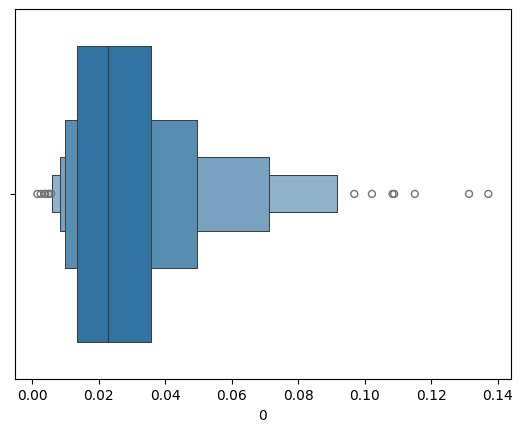

In [29]:
sb.boxenplot(data=sonar_df, x=sonar_df[0])

In [30]:
# Zeige Shape an.
# - Es gibt viele Features. 
sonar_df.shape

(208, 61)

In [31]:
sonar_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

Das Target ist das letzte Feature.

In [39]:
# Die Klassen sind ausgeglichen.
sonar_df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

Bevor das Dataset aufgeteilt wird, muss ein Encoding der nicht numerischen Werte stattfinden (hier, die Klasse). 

In [38]:
# Erstelle Dummies und lösche erste Spalte.
rm_df = pd.get_dummies(sonar_df[60], drop_first=True, dtype='int')
rm_df.head

<bound method NDFrame.head of      R
0    1
1    1
2    1
3    1
4    1
..  ..
203  0
204  0
205  0
206  0
207  0

[208 rows x 1 columns]>

In [49]:
# Lösche Klasse, dann füge Dummies hinzu.
sonar_df2  = sonar_df.drop([60],   axis='columns')
sonar_df2  = pd.concat([sonar_df2, rm_df], axis='columns')
sonar_df2['R'].head()

0    1
1    1
2    1
3    1
4    1
Name: R, dtype: int32

In [54]:
X_train, X_test, y_train, y_test = train_test_split(sonar_df2.drop(['R'], axis='columns'), sonar_df2['R'], test_size=.2)
X_train.shape

(166, 60)

Jetzt kann das Model erstellt werden. 

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=60, input_shape=(60,), activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(units=15, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/rock_mines/w_outlier", histogram_freq=1)

model.compile(
    optimizer = 'adam',
    loss      = 'binary_crossentropy',
    metrics  = ['accuracy']
)


In [80]:
model.fit(X_train, y_train, epochs=40, batch_size=8)
# batch_size: Mini-Batch Gradientenasbtieg Samples. 

Epoch 1/40
21/21 [==============================] - 1s 1000us/step - loss: 0.6949 - accuracy: 0.4880
Epoch 2/40
21/21 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.5422
Epoch 3/40
21/21 [==============================] - 0s 950us/step - loss: 0.6880 - accuracy: 0.5120
Epoch 4/40
21/21 [==============================] - 0s 950us/step - loss: 0.6874 - accuracy: 0.5361
Epoch 5/40
21/21 [==============================] - 0s 950us/step - loss: 0.6838 - accuracy: 0.5361
Epoch 6/40
21/21 [==============================] - 0s 900us/step - loss: 0.6806 - accuracy: 0.5422
Epoch 7/40
21/21 [==============================] - 0s 1ms/step - loss: 0.6816 - accuracy: 0.5904
Epoch 8/40
21/21 [==============================] - 0s 950us/step - loss: 0.6685 - accuracy: 0.5723
Epoch 9/40
21/21 [==============================] - 0s 948us/step - loss: 0.6635 - accuracy: 0.6084
Epoch 10/40
21/21 [==============================] - 0s 900us/step - loss: 0.6587 - accuracy: 0.6386
Ep

In [81]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8333


[0.3549567759037018, 0.8333333134651184]

Danach kann eine Heat-Map erstellt werden.

In [67]:
# Führe eine Predictions durch. 
model.predict(X_test[:1])

1/1 [==============================] - 0s 15ms/step


array([[0.9997908]], dtype=float32)

In [68]:
# Konvertiere Werte
preds = [ 0 if x<0.5 else 1 for x in model.predict(X_test) ]

2/2 [==============================] - 0s 2ms/step


In [69]:
tf.math.confusion_matrix(labels=y_test, predictions=preds)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20,  4],
       [ 2, 16]])>

Text(33.22222222222222, 0.5, 'Truth')

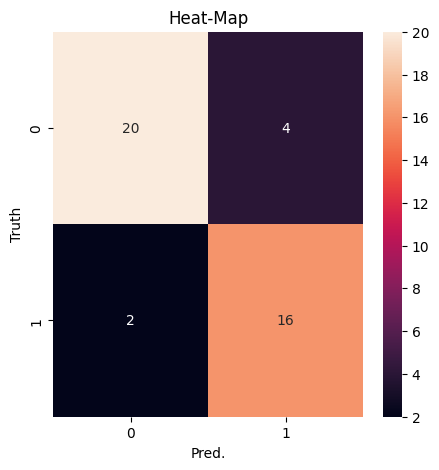

In [73]:
# Mit Matplotlib und Seaborn visualisieren.
# - Hier ohne Klassennamen.
heatmap = tf.math.confusion_matrix(labels=y_test, predictions=preds)
plt.figure(figsize=(5, 5))
sn.heatmap(heatmap, annot=True)
plt.title("Heat-Map")
plt.xlabel("Pred.")
plt.ylabel("Truth")

Wir können zusätzlich einen Report mit Sklearn erstellen. 

In [77]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.80      0.89      0.84        18

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42

